In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

In [3]:
atpVel = pd.read_csv('data/spd_std123s5R1ATP.csv', names=['spd','std'])
ATP = np.array([500,1000,1500,2000,2500,3000,3500,4000,4500])

In [4]:
atp = ATP; spd10 = atpVel['spd']; #NB: atp is the substrate [s]

def michaelis10(atp,km):
    return( (atp*spd10.max())/(atp+km) )
popt10, pcov10 = curve_fit(michaelis10, atp, spd10)
kmVal10 = popt10[0]
yVal10 = ( atp*spd10.max() ) / (kmVal10+atp) # yVakl V = Vmax

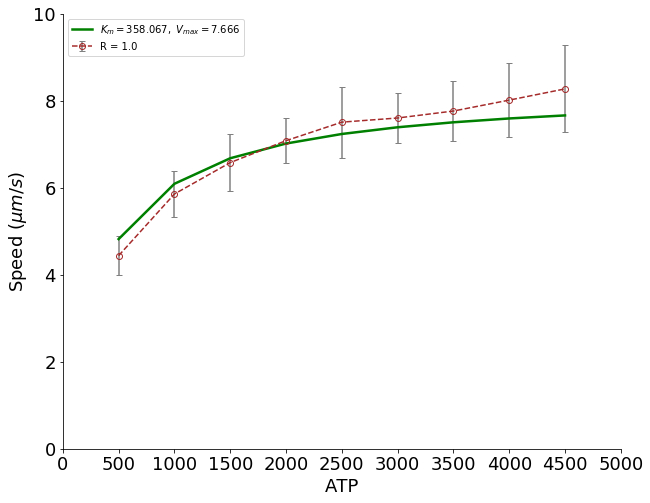

In [22]:

fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(ATP,atpVel['spd'],atpVel['std'], capsize=3, linestyle='--', color='brown', marker='o', markerfacecolor='none', ecolor='grey', label='R = 1.0')
ax.plot(ATP,michaelis10(atp,*popt10),'g-', lw=2.5, label='$K_m = %.3f,\ V_{max} = %.3f$'%(kmVal10,np.max(yVal10)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(0,12,2))
ax.set_xticks(np.arange(0,5001,500))
ax.tick_params(labelsize=18)

ax.set_xlabel('ATP', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)

ax.legend(loc='upper left')

#plt.savefig('fig/ATPspeed.png', fmt='png', dpi=1500, bbox_inches='tight')

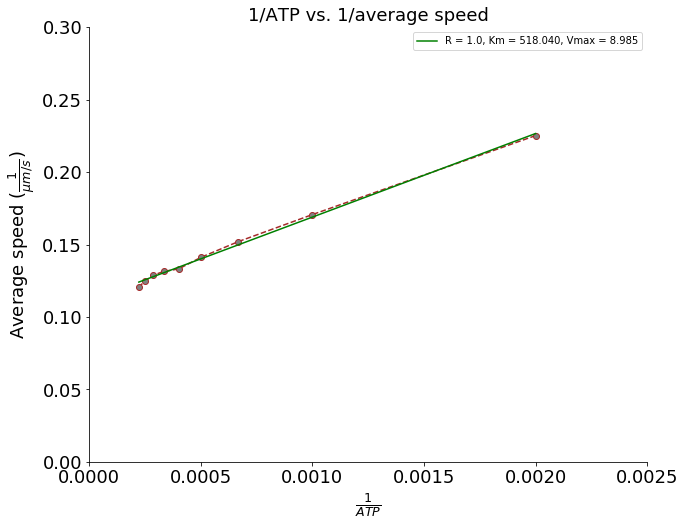

In [23]:
fig, ax = plt.subplots(figsize=(10,8))

xx = 1/ATP; yy = 1/atpVel['spd']

slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
vmax = 1/intercept; km = slope/intercept

plt.plot(xx,yy, marker='o', color='brown', linestyle='--', markerfacecolor='grey')
plt.plot(xx,(slope*xx+intercept), color='green', label='R = 1.0, Km = %.3f, Vmax = %.3f'%(km,vmax))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,0.003,step=0.0005))
ax.set_yticks(np.arange(0,0.31,step=0.05))
ax.tick_params(labelsize=18)

ax.set_title('1/ATP vs. 1/average speed', fontsize=18)
ax.set_xlabel(r'$\frac{1}{ATP}$', fontsize=18)
ax.set_ylabel(r'Average speed ($\frac{1}{\mu m/s}$)', fontsize=18)
ax.legend(loc='best')
#ax.grid()

#plt.savefig('fig/InvFitATP500to4500.png',fmt='png',dpi=1500, bbox_inches='tight')
#plt.savefig('fig/micInvFitATP50to500v7*.svg',fmt='svg',dpi=1000, bbox_inches='tight')

plt.show()